In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
data = pd.read_csv('Program_3_Dataset.csv')

In [5]:
#Display number of samples (row) and number of attributes(columns) in the data set
rows, columns = data.shape

print(f'Number of samples (rows): {rows}')
print(f'Number of attributes (columns): {columns}')

Number of samples (rows): 41188
Number of attributes (columns): 21


In [6]:
#Display all columns names in the data set
print(data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'Y']


In [7]:
#Display the structure of the data frame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#Display the statistical information about the dataset
print(data.describe())

               age      duration      campaign         pdays      previous   
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000  \
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [9]:
#Display no of samples based on the classes
class_counts = data['education'].value_counts()

print("Number of samples based on classes:")
print(class_counts)

Number of samples based on classes:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


In [10]:
#Find unique values from ‘job’ attribute count the unique values in ‘job’ attribute

uni_jobs = data['job'].unique()
job_count = data['job'].value_counts()

print(f"Unique job: {uni_jobs}")
print(f"\nJob counts: {job_count}")

Unique job: ['housemaid' 'services' 'admin.' 'technician' 'management' 'entrepreneur'
 'blue-collar' 'unemployed' 'unknown' 'retired' 'student' 'self-employed']

Job counts: job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


In [11]:
#Check for missing values
missing_values = data.isnull().sum()
no_missing_values = data.notnull().sum()
# Identify columns with missing values
columns_with_missing = missing_values[missing_values > 0].index.tolist()

print("Columns with missing values:", columns_with_missing)
print("\nNumber of columns with missing values:", len(columns_with_missing))

Columns with missing values: []

Number of columns with missing values: 0


In [20]:

# Extract independent variables (features)
X = data[['duration', 'age', 'campaign']]

# Extract dependent variable (target)
y = data['Y']

In [13]:
#Clasiffication Models
# Preprocess the dataset using Min-Max Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [22]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Predict using KNN Classifier
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

In [24]:
# Evaluate KNN Classifier
print("KNN Classifier")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_knn))
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_knn))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred_knn))

KNN Classifier
Training Accuracy: 0.9107904685928341
Testing Accuracy: 0.8842761187990612
Classification Report (Test):
              precision    recall  f1-score   support

          no       0.91      0.96      0.94     10969
         yes       0.47      0.26      0.34      1388

    accuracy                           0.88     12357
   macro avg       0.69      0.61      0.64     12357
weighted avg       0.86      0.88      0.87     12357

Confusion Matrix (Test):
[[10560   409]
 [ 1021   367]]


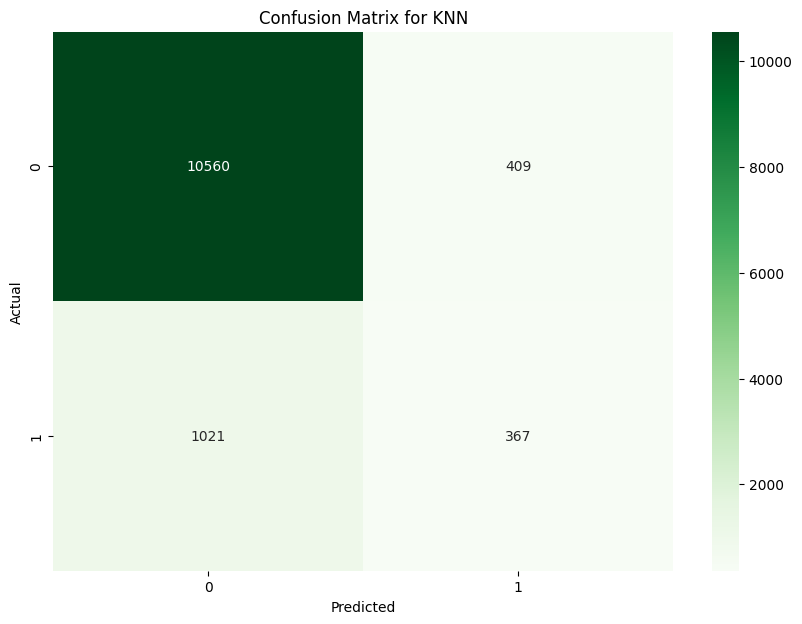

In [25]:
# Plot Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [26]:
#naive bayes
# Build Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [27]:
# Predict using Naive Bayes Classifier
y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb = nb.predict(X_test)

In [28]:
print("\nNaive Bayes Classifier")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_nb))


Naive Bayes Classifier
Training Accuracy: 0.8904998092331171
Testing Accuracy: 0.8935016589787165


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_nb))

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.96      0.94     10969
         yes       0.54      0.35      0.43      1388

    accuracy                           0.89     12357
   macro avg       0.73      0.66      0.68     12357
weighted avg       0.88      0.89      0.88     12357

Confusion Matrix:
[[10550   419]
 [  897   491]]


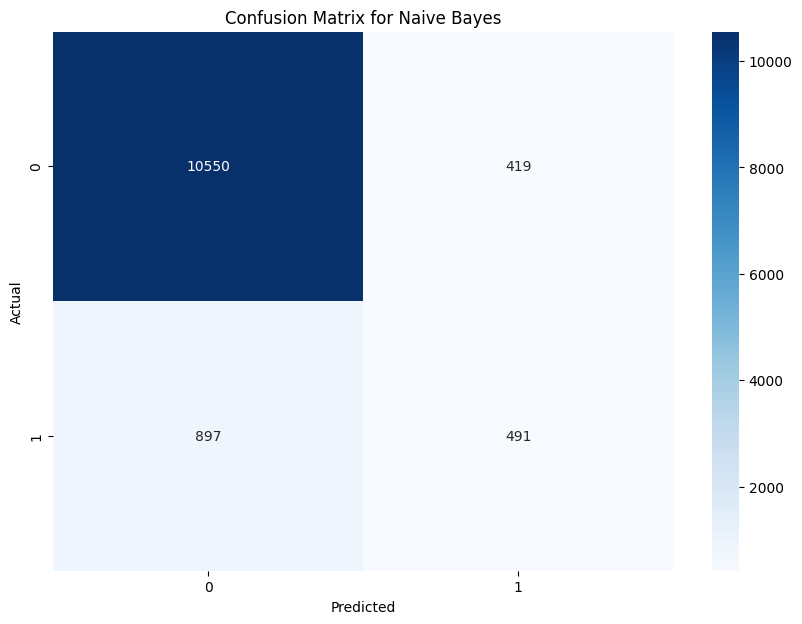

In [30]:
cm_nb = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()